In [20]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv("dataset-of-10s.csv")

print("📊 Dữ liệu mẫu:")
print(data.info())

📊 Dữ liệu mẫu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6398 non-null   object 
 1   artist            6398 non-null   object 
 2   uri               6398 non-null   object 
 3   danceability      6398 non-null   float64
 4   energy            6398 non-null   float64
 5   key               6398 non-null   int64  
 6   loudness          6398 non-null   float64
 7   mode              6398 non-null   int64  
 8   speechiness       6398 non-null   float64
 9   acousticness      6398 non-null   float64
 10  instrumentalness  6398 non-null   float64
 11  liveness          6398 non-null   float64
 12  valence           6398 non-null   float64
 13  tempo             6398 non-null   float64
 14  duration_ms       6398 non-null   int64  
 15  time_signature    6398 non-null   int64  
 16  chorus_hit        6398 non-

🎯 Độ chính xác (Accuracy): 0.8641
🎯 F1-score: 0.8726
🎯 Độ chính xác (%): 86.41%

📊 Báo cáo phân loại chi tiết:
              precision    recall  f1-score   support

           0       0.92      0.80      0.85       640
           1       0.82      0.93      0.87       640

    accuracy                           0.86      1280
   macro avg       0.87      0.86      0.86      1280
weighted avg       0.87      0.86      0.86      1280



<Figure size 1000x600 with 0 Axes>

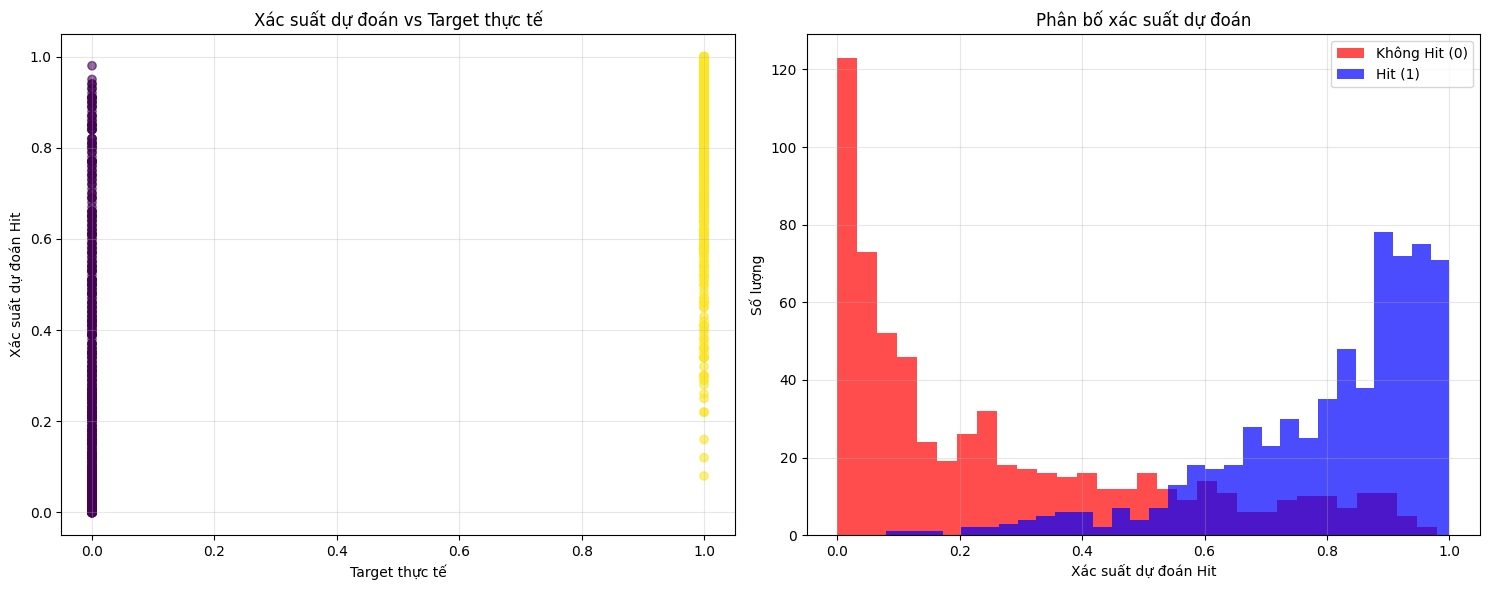

In [3]:
# 3. Xác định biến đầu vào (X) và biến mục tiêu (y)
# Đầu vào: tất cả các cột trừ 'target'
X = data.drop('target', axis=1)
y = data['target']

# 3.1. Tiền xử lý dữ liệu: Xử lý các cột dạng object (chuỗi) bằng LabelEncoder hoặc OneHotEncoder
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Sử dụng ColumnTransformer để xử lý dữ liệu
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)

# 4. Chia dữ liệu train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Xây dựng pipeline với tiền xử lý + RandomForest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # with_mean=False vì có thể có one-hot
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 6. Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# 7. Dự đoán trên tập test
y_pred = pipeline.predict(X_test)
if hasattr(pipeline.named_steps['clf'], "predict_proba"):
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
else:
    y_pred_proba = np.zeros_like(y_pred, dtype=float)

# 8. Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"🎯 Độ chính xác (Accuracy): {accuracy:.4f}")
print(f"🎯 F1-score: {f1:.4f}")
print(f"🎯 Độ chính xác (%): {accuracy*100:.2f}%")

print("\n📊 Báo cáo phân loại chi tiết:")
print(classification_report(y_test, y_pred))

# 9. Vẽ biểu đồ so sánh xác suất dự đoán
plt.figure(figsize=(10, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot: xác suất dự đoán vs target thực tế
ax1.scatter(y_test, y_pred_proba, alpha=0.6, c=y_test, cmap='viridis')
ax1.set_xlabel('Target thực tế')
ax1.set_ylabel('Xác suất dự đoán Hit')
ax1.set_title('Xác suất dự đoán vs Target thực tế')
ax1.grid(True, alpha=0.3)

# Histogram: phân bố xác suất dự đoán cho từng lớp
ax2.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Không Hit (0)', color='red')
ax2.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Hit (1)', color='blue')
ax2.set_xlabel('Xác suất dự đoán Hit')
ax2.set_ylabel('Số lượng')
ax2.set_title('Phân bố xác suất dự đoán')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- Tiếng Việt ---
# Đã bổ sung pipeline tiền xử lý dữ liệu (impute, encode, scale) và dùng RandomForest trong pipeline.
# Tự động xử lý các cột dạng chuỗi, tránh lỗi "could not convert string to float".
# Đánh giá mô hình với accuracy, f1-score và classification_report.
# Vẽ biểu đồ xác suất dự đoán như yêu cầu.

# --- English ---
# Added preprocessing pipeline (impute, encode, scale) and used RandomForest in the pipeline.
# Automatically handles string/object columns, avoids "could not convert string to float" error.
# Model evaluation with accuracy, f1-score, and classification_report.
# Plots for predicted probability as required.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import pandas as pd

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

perm_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': result.importances_mean
}).sort_values('importance', ascending=False)

print("🏆 Top 10 biến quan trọng (Permutation Importance):")
print(perm_importance.head(10))


ValueError: could not convert string to float: 'Juju On That Beat (TZ Anthem)'

<Figure size 1000x600 with 0 Axes>

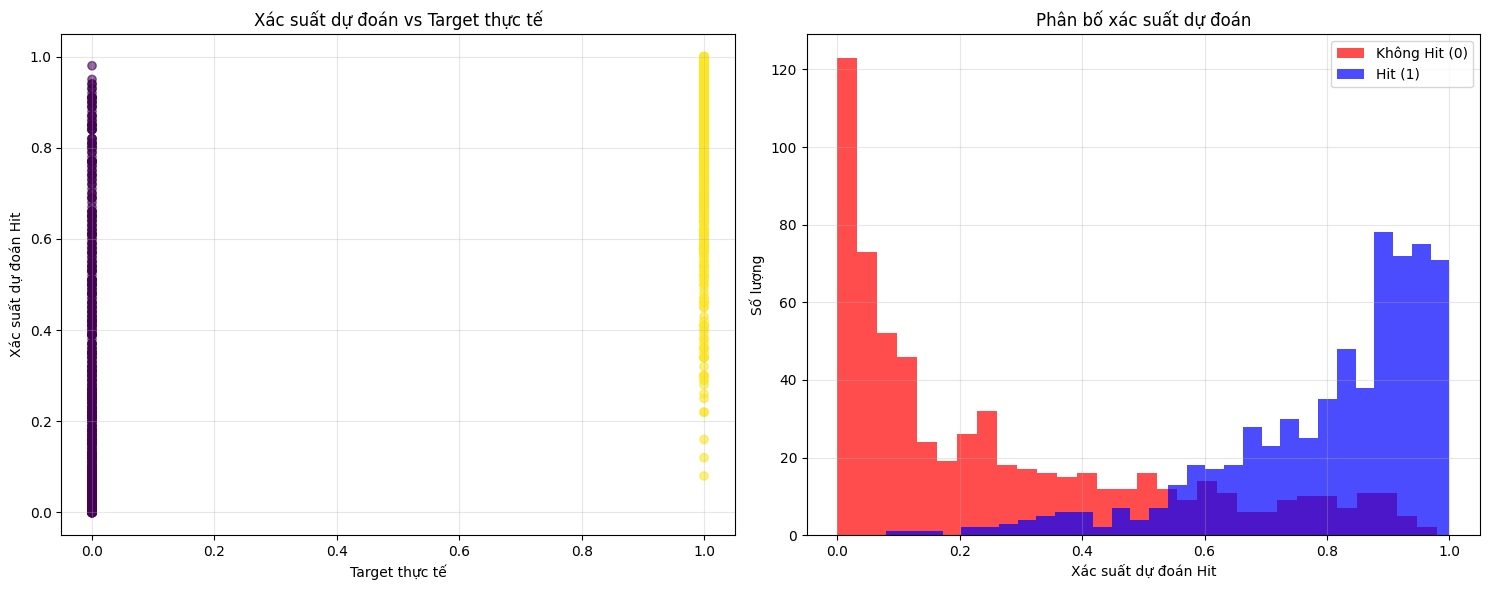

Trung bình xác suất dự đoán Hit khi thực tế là 0: 0.269
Trung bình xác suất dự đoán Hit khi thực tế là 1: 0.802
KS statistic (độ tách biệt phân phối): 0.738 (p-value: 1.82e-169)
Độ chính xác khi dùng ngưỡng 0.5: 0.861

--- Chart analysis by code ---
Mean predicted probability for true 0: 0.269
Mean predicted probability for true 1: 0.802
KS statistic (distribution separation): 0.738 (p-value: 1.82e-169)
Accuracy at threshold 0.5: 0.861


In [ ]:
# Vẽ biểu đồ so sánh xác suất dự đoán
plt.figure(figsize=(10, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ scatter: Xác suất dự đoán vs Target thực tế
ax1.scatter(y_test, y_pred_proba, alpha=0.6, c=y_test, cmap='viridis')
ax1.set_xlabel('Target thực tế')
ax1.set_ylabel('Xác suất dự đoán Hit')
ax1.set_title('Xác suất dự đoán vs Target thực tế')
ax1.grid(True, alpha=0.3)

# Biểu đồ histogram: Phân bố xác suất dự đoán cho từng lớp
ax2.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Không Hit (0)', color='red')
ax2.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Hit (1)', color='blue')
ax2.set_xlabel('Xác suất dự đoán Hit')
ax2.set_ylabel('Số lượng')
ax2.set_title('Phân bố xác suất dự đoán')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Phân tích biểu đồ bằng code

# Phân tích scatter plot: Tính trung bình xác suất dự đoán cho từng lớp thực tế
mean_proba_0 = y_pred_proba[y_test == 0].mean()
mean_proba_1 = y_pred_proba[y_test == 1].mean()
print(f"Trung bình xác suất dự đoán Hit khi thực tế là 0: {mean_proba_0:.3f}")
print(f"Trung bình xác suất dự đoán Hit khi thực tế là 1: {mean_proba_1:.3f}")

# Đánh giá mức độ tách biệt giữa hai lớp dựa trên xác suất dự đoán
from scipy.stats import ks_2samp
ks_stat, ks_pvalue = ks_2samp(y_pred_proba[y_test == 0], y_pred_proba[y_test == 1])
print(f"KS statistic (độ tách biệt phân phối): {ks_stat:.3f} (p-value: {ks_pvalue:.3g})")

# Tính tỉ lệ dự đoán đúng nếu dùng ngưỡng 0.5
pred_label = (y_pred_proba >= 0.5).astype(int)
accuracy = (pred_label == y_test).mean()
print(f"Độ chính xác khi dùng ngưỡng 0.5: {accuracy:.3f}")

# English summary
print("\n--- Chart analysis by code ---")
print(f"Mean predicted probability for true 0: {mean_proba_0:.3f}")
print(f"Mean predicted probability for true 1: {mean_proba_1:.3f}")
print(f"KS statistic (distribution separation): {ks_stat:.3f} (p-value: {ks_pvalue:.3g})")
print(f"Accuracy at threshold 0.5: {accuracy:.3f}")

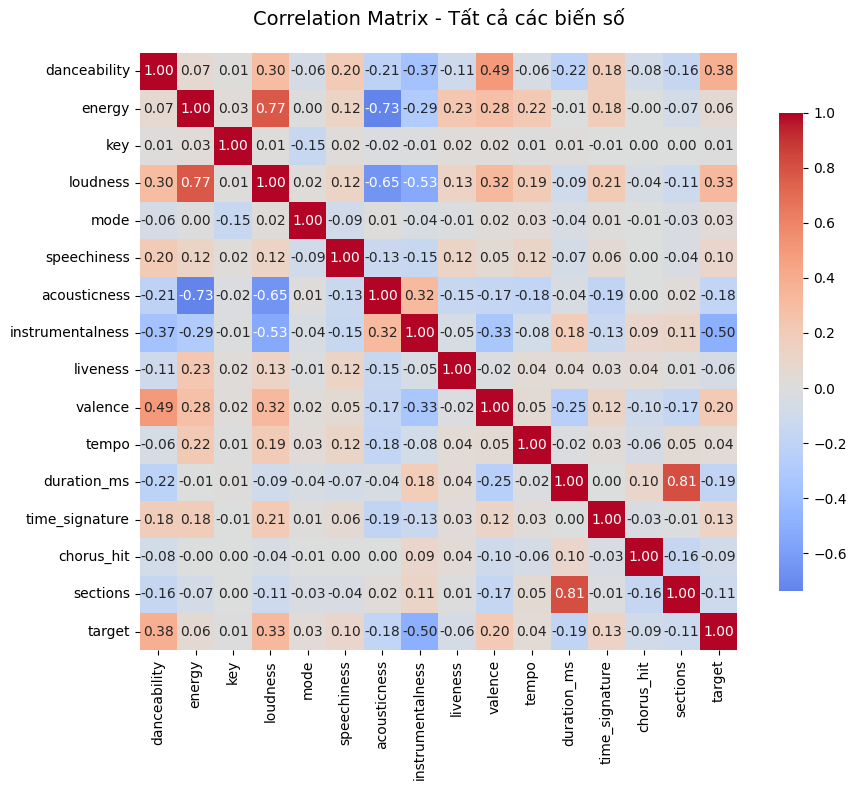

In [5]:
# Get all numeric columns from the DataFrame
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Tính ma trận tương quan chỉ cho các biến số
correlation_matrix = data[numeric_columns].corr()

# 2. Vẽ heatmap tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Tất cả các biến số', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

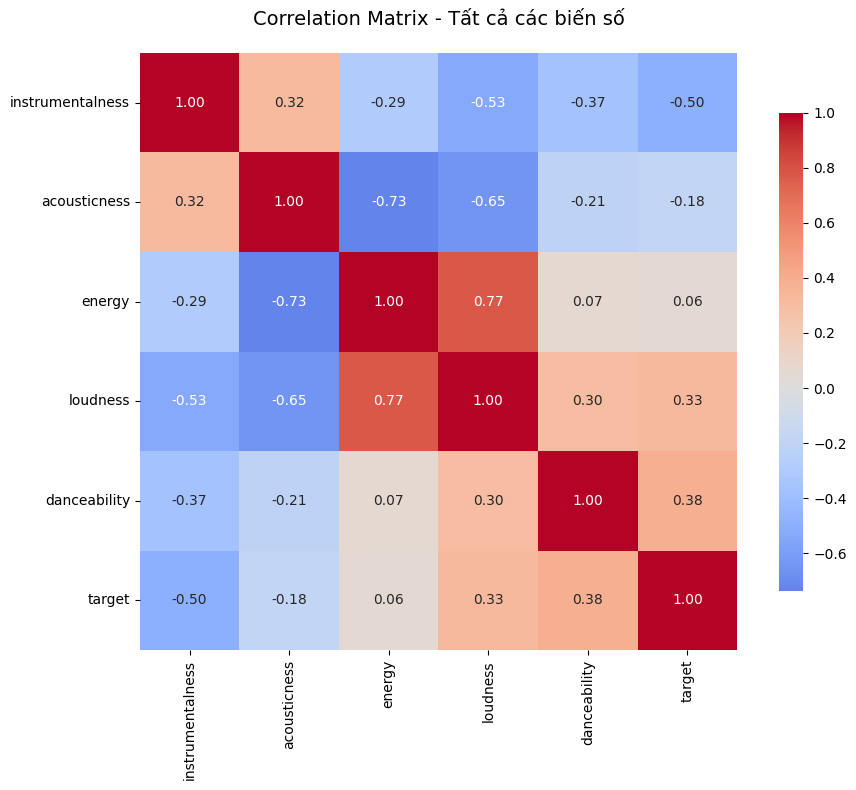

In [6]:
# Chỉ lấy 5 biến số đặc trưng đã chọn
selected_features = ['instrumentalness', 'acousticness', 'energy', 'loudness', 'danceability', 'target']

# Tính ma trận tương quan cho 5 biến này
correlation_matrix = data[selected_features].corr()

# 2. Vẽ heatmap tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Tất cả các biến số', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

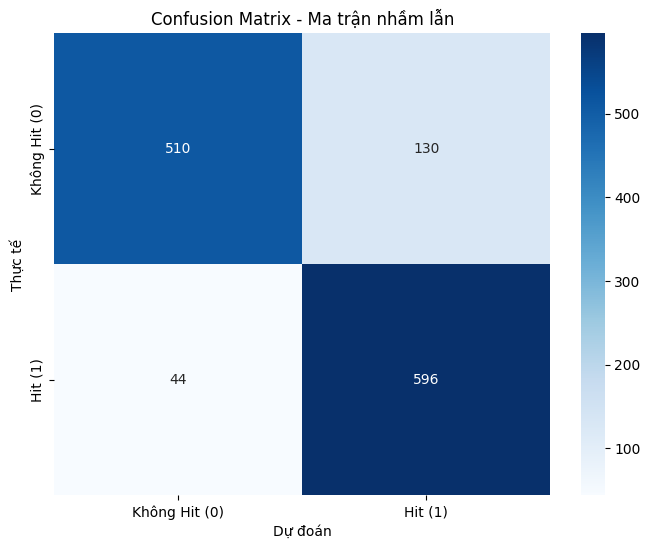

📋 Chi tiết Confusion Matrix:
True Negatives (TN): 510 - Dự đoán đúng 'Không Hit'
False Positives (FP): 130 - Dự đoán sai 'Hit' (thực tế 'Không Hit')
False Negatives (FN): 44 - Dự đoán sai 'Không Hit' (thực tế 'Hit')
True Positives (TP): 596 - Dự đoán đúng 'Hit'


In [7]:
# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Không Hit (0)', 'Hit (1)'],
            yticklabels=['Không Hit (0)', 'Hit (1)'])
plt.title('Confusion Matrix - Ma trận nhầm lẫn')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

print("📋 Chi tiết Confusion Matrix:")
print(f"True Negatives (TN): {cm[0,0]} - Dự đoán đúng 'Không Hit'")
print(f"False Positives (FP): {cm[0,1]} - Dự đoán sai 'Hit' (thực tế 'Không Hit')")
print(f"False Negatives (FN): {cm[1,0]} - Dự đoán sai 'Không Hit' (thực tế 'Hit')")
print(f"True Positives (TP): {cm[1,1]} - Dự đoán đúng 'Hit'")

<Figure size 1000x600 with 0 Axes>

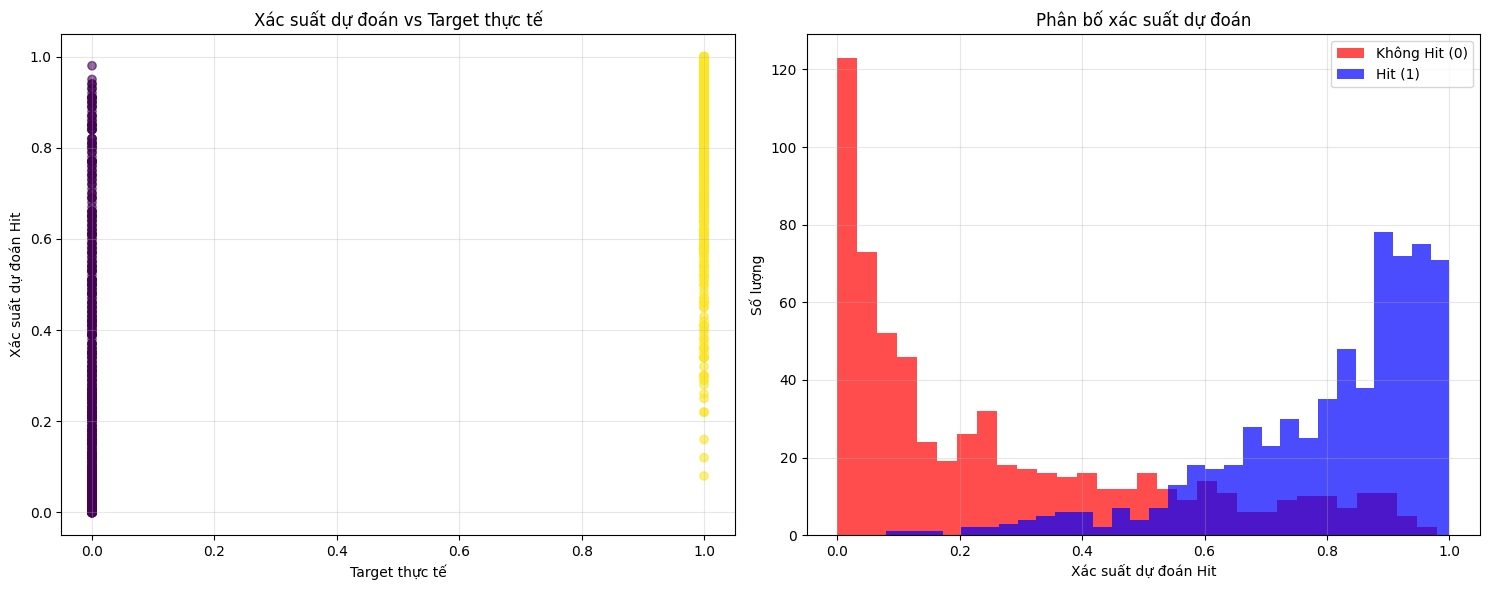

Trung bình xác suất dự đoán Hit khi thực tế là 0: 0.269
Trung bình xác suất dự đoán Hit khi thực tế là 1: 0.802
KS statistic (độ tách biệt phân phối): 0.738 (p-value: 1.82e-169)
Độ chính xác khi dùng ngưỡng 0.5: 0.861

--- Chart analysis by code ---
Mean predicted probability for true 0: 0.269
Mean predicted probability for true 1: 0.802
KS statistic (distribution separation): 0.738 (p-value: 1.82e-169)
Accuracy at threshold 0.5: 0.861


In [8]:
# Vẽ biểu đồ so sánh xác suất dự đoán
plt.figure(figsize=(10, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ scatter: Xác suất dự đoán vs Target thực tế
ax1.scatter(y_test, y_pred_proba, alpha=0.6, c=y_test, cmap='viridis')
ax1.set_xlabel('Target thực tế')
ax1.set_ylabel('Xác suất dự đoán Hit')
ax1.set_title('Xác suất dự đoán vs Target thực tế')
ax1.grid(True, alpha=0.3)

# Biểu đồ histogram: Phân bố xác suất dự đoán cho từng lớp
ax2.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='Không Hit (0)', color='red')
ax2.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Hit (1)', color='blue')
ax2.set_xlabel('Xác suất dự đoán Hit')
ax2.set_ylabel('Số lượng')
ax2.set_title('Phân bố xác suất dự đoán')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Phân tích biểu đồ bằng code

# Phân tích scatter plot: Tính trung bình xác suất dự đoán cho từng lớp thực tế
mean_proba_0 = y_pred_proba[y_test == 0].mean()
mean_proba_1 = y_pred_proba[y_test == 1].mean()
print(f"Trung bình xác suất dự đoán Hit khi thực tế là 0: {mean_proba_0:.3f}")
print(f"Trung bình xác suất dự đoán Hit khi thực tế là 1: {mean_proba_1:.3f}")

# Đánh giá mức độ tách biệt giữa hai lớp dựa trên xác suất dự đoán
from scipy.stats import ks_2samp
ks_stat, ks_pvalue = ks_2samp(y_pred_proba[y_test == 0], y_pred_proba[y_test == 1])
print(f"KS statistic (độ tách biệt phân phối): {ks_stat:.3f} (p-value: {ks_pvalue:.3g})")

# Tính tỉ lệ dự đoán đúng nếu dùng ngưỡng 0.5
pred_label = (y_pred_proba >= 0.5).astype(int)
accuracy = (pred_label == y_test).mean()
print(f"Độ chính xác khi dùng ngưỡng 0.5: {accuracy:.3f}")

# English summary
print("\n--- Chart analysis by code ---")
print(f"Mean predicted probability for true 0: {mean_proba_0:.3f}")
print(f"Mean predicted probability for true 1: {mean_proba_1:.3f}")
print(f"KS statistic (distribution separation): {ks_stat:.3f} (p-value: {ks_pvalue:.3g})")
print(f"Accuracy at threshold 0.5: {accuracy:.3f}")

In [18]:
# Hiển thị feature importance (tầm quan trọng của các biến)
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
perm_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': result.importances_mean
}).sort_values('importance', ascending=False)

print("🏆 Top 10 biến quan trọng nhất:")
print(perm_importance.head(10))

plt.figure(figsize=(12, 8))
top_features = perm_importance.head(15)
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('Top 15 Biến Quan Trọng Nhất')
plt.xlabel('Tầm quan trọng')
plt.tight_layout()
plt.show()

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'